# Part 0 - Preliminaries

## Install Libraries

In [83]:
#%pip install category_encoders

## Import Libraries

In [84]:
# Standard Libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import boxcox, yeojohnson

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Machine Learning Libraries
from category_encoders import TargetEncoder
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

# Apply Seaborn's aesthetic parameters to match Matplotlib's style
sns.set()

# Set Pandas display option
pd.set_option('display.max_columns', None)


# Load Data

Data:
- 3376 rows
- 46 column

Next: Check for categorical and numerical variables

In [85]:
df = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Categoical Variables

In [86]:
print("Catgorical Variables:\n")
cat_columns = df.select_dtypes(include=[object]).columns.tolist()
for col in cat_columns:
    print(f"\t- {col}")

df[cat_columns].head()

Catgorical Variables:

	- BuildingType
	- PrimaryPropertyType
	- PropertyName
	- Address
	- City
	- State
	- TaxParcelIdentificationNumber
	- Neighborhood
	- ListOfAllPropertyUseTypes
	- LargestPropertyUseType
	- SecondLargestPropertyUseType
	- ThirdLargestPropertyUseType
	- YearsENERGYSTARCertified
	- ComplianceStatus
	- Outlier


,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Compliant,NaN


# Numerical Variables

In [87]:
print("Numerical Variables:")
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_columns:
    print(f"\t- {col}")

df[num_columns].head()

Numerical Variables:
	- OSEBuildingID
	- DataYear
	- ZipCode
	- CouncilDistrictCode
	- Latitude
	- Longitude
	- YearBuilt
	- NumberofBuildings
	- NumberofFloors
	- PropertyGFATotal
	- PropertyGFAParking
	- PropertyGFABuilding(s)
	- LargestPropertyUseTypeGFA
	- SecondLargestPropertyUseTypeGFA
	- ThirdLargestPropertyUseTypeGFA
	- ENERGYSTARScore
	- SiteEUI(kBtu/sf)
	- SiteEUIWN(kBtu/sf)
	- SourceEUI(kBtu/sf)
	- SourceEUIWN(kBtu/sf)
	- SiteEnergyUse(kBtu)
	- SiteEnergyUseWN(kBtu)
	- SteamUse(kBtu)
	- Electricity(kWh)
	- Electricity(kBtu)
	- NaturalGas(therms)
	- NaturalGas(kBtu)
	- Comments
	- TotalGHGEmissions
	- GHGEmissionsIntensity


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,NaN,249.98,2.83
1,2,2016,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,NaN,295.86,2.86
2,3,2016,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,NaN,2089.28,2.19
3,5,2016,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,NaN,286.43,4.67
4,8,2016,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,NaN,505.01,2.88


# Missing Values

Action: Remove all columns that have 100% missing values

Result: One column with 100% missing values was removed

In [88]:
# Function to drop missing and duplicate values
def clean_data(df):
    """
    Function to drop all columns with 100% missing values and duplicate rows.
    :param df: Input pandas DataFrame
    """
    # Drop columns with 100% missing values
    df.dropna(how="all", axis="columns", inplace=True)
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

clean_data(df)

df.shape

(3376, 45)

# Missing Values

Action: Determine the percentage of missing values in each column

In [89]:
def missing_data_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function to calculate the percentage of missing data for each column and the indices of rows with missing data.

    Args:
    - df (pd.DataFrame): Input dataframe

    Returns:
    - pd.DataFrame: A dataframe with columns 'percentage_missing' and 'missing_rows'
    """

    # Percentage of missing data for each column
    missing_percentage = df.isnull().mean() * 100

    # Rows where data is missing for each column
    missing_rows = df.apply(lambda col: df[col.name][col.isnull()].index.tolist())

    # Combining the results
    result_df = pd.DataFrame({
        'percentage_missing': missing_percentage,
        'missing_rows': missing_rows
    })

    # Filter out columns with 0% missing data
    result_df = result_df[result_df['percentage_missing'] > 0]

    return result_df.round(2)

missing_data_info_df = missing_data_info(df)
missing_data_info_df

,percentage_missing,missing_rows
ZipCode,0.47,"[3360, 3361, 3362, 3363, 3364, 3365, 3366, 336..."
NumberofBuildings,0.24,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670]"
ListOfAllPropertyUseTypes,0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
LargestPropertyUseType,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
LargestPropertyUseTypeGFA,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
SecondLargestPropertyUseType,50.27,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 19, 20, 2..."
SecondLargestPropertyUseTypeGFA,50.27,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 19, 20, 2..."
ThirdLargestPropertyUseType,82.35,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
ThirdLargestPropertyUseTypeGFA,82.35,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
YearsENERGYSTARCertified,96.48,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


## Missing Values - Outliers

Question:
- Why are there so many missing values for....
    - SecondLargestPropertyUseType
    - SecondLargestPropertyUseTypeGFA
    - ThirdLargestPropertyUseType
    - ThirdLargestPropertyUseTypeGFA
    - YearsENERGYSTARCertified
    - ENERGYSTARScore	
    - Outlier
- What does GFA mean?

Actions:
- Check unique values
- Check rows where there are not missing values to understand better
- Google GFA
- PropertyGFATotal isn't the sum of PropertyGFABuilding(s) & PropertyGFATotal

$$  PropertyGFATotal \neq PropertyGFABuilding(s) + PropertyGFATotal $$


Results:
- Missing values are not outliers so we can replace missing values with "Not outlier" value
- Gross floor area, total floor area ($m^2$) inside the building envelope, including the external walls, and excluding the roof - [link](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

In [90]:
print(df["Outlier"].unique().tolist())

display(df.dropna(subset = "Outlier").head(10))

df["Outlier"] = df["Outlier"].fillna('Not outlier').astype(str)

def count_years(column: pd.Series) -> pd.Series:
    """
    Function to count the number of years (represented as 4-digit numbers) in each string in the given series.
    If a value is NaN, it returns 0.
    
    Args:
    - column (pd.Series): Input series with strings containing concatenated years
    
    Returns:
    - pd.Series: A series with counts of years for each string
    """
    return column.fillna('').astype(str).apply(lambda x: len([x[i:i+4] for i in range(0, len(x), 4)]))

# Transform Column
df["YearsENERGYSTARCertified"] = count_years(df["YearsENERGYSTARCertified"])

# Create Column
df["No.PropertyTypes"] = df["ListOfAllPropertyUseTypes"].str.split(",").apply(lambda x: len(x) if type(x) == list else np.nan)

# Clean Columns
df["SecondLargestPropertyUseType"].fillna("No Secondary Property", inplace = True)
df["ThirdLargestPropertyUseType"].fillna("No Third Property", inplace = True)
df["LargestPropertyUseTypeGFA"] = df["LargestPropertyUseTypeGFA"].fillna(0)
df["SecondLargestPropertyUseTypeGFA"] = df["SecondLargestPropertyUseTypeGFA"].fillna(0)
df["ThirdLargestPropertyUseTypeGFA"] = df["ThirdLargestPropertyUseTypeGFA"].fillna(0)

[nan, 'High outlier', 'Low outlier']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,NaN,1.0,311.700012,311.700012,978.900024,978.900024,2.713719e+07,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,0,167941,"Multifamily Housing, Swimming Pool",Multifamily Housing,138787.0,Parking,99952.0,Swimming Pool,0.0,NaN,100.0,17.299999,18.700001,50.400002,54.000000,2.407904e+06,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,NaN,9.700000,10.400000,30.400000,32.700001,2.559712e+05,2.754120e+05,0.0,7.502090e+04,255971.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.78,0.06
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,35805,0,35805,K-12 School,K-12 School,35805.0,NaN,NaN,NaN,NaN,NaN,100.0,12.100000,12.100000,27.000000,27.000000,4.314717e+05,4.314717e+05,0.0,7.228240e+04,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,2016,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,Seattle,WA,98126.0,1595200000,1,SOUTHWEST,47.58143,-122.37510,1990,1.0,3,70207,0,70207,Multifamily Housing,Multifamily Housing,71273.0,NaN,NaN,NaN,NaN,NaN,100.0,9.900000,9.900000,30.900000,30.900000,7.024814e+05,7.024814e+05,0.0,2.058855e+05,70

In [91]:
missing_data_info(df)

,percentage_missing,missing_rows
ZipCode,0.47,"[3360, 3361, 3362, 3363, 3364, 3365, 3366, 336..."
NumberofBuildings,0.24,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670]"
ListOfAllPropertyUseTypes,0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
LargestPropertyUseType,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
ENERGYSTARScore,24.97,"[5, 7, 15, 16, 18, 21, 24, 25, 26, 28, 31, 32,..."
SiteEUI(kBtu/sf),0.21,"[304, 578, 758, 1549, 1792, 2474, 2670]"
SiteEUIWN(kBtu/sf),0.18,"[563, 578, 758, 1792, 2474, 2670]"
SourceEUI(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SourceEUIWN(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SiteEnergyUse(kBtu),0.15,"[578, 758, 1792, 2474, 2670]"


In [92]:
def unique_percentage(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function to calculate the unique values and the percentage of unique values for each column in the given dataframe.
    
    Args:
    - df (pd.DataFrame): Input dataframe
    
    Returns:
    - pd.DataFrame: A dataframe with columns 'unique_values' and 'percentage_unique' for each column in the input dataframe.
    """
    # Calculate unique values for each column
    unique_counts = df.nunique()
    
    # Calculate percentage of unique values for each column
    percentage_unique = (unique_counts / len(df)) * 100
    
    # Prepare a dataframe to return the results
    result_df = pd.DataFrame({
        'unique_values': unique_counts,
        'percentage_unique': percentage_unique
    })
    
    return result_df

In [93]:
unique_percentage(df)

,unique_values,percentage_unique
OSEBuildingID,3376,100.000000
DataYear,1,0.029621
BuildingType,8,0.236967
PrimaryPropertyType,24,0.710900
PropertyName,3362,99.585308
Address,3354,99.348341
City,1,0.029621
State,1,0.029621
ZipCode,55,1.629147
TaxParcelIdentificationNumber,3268,96.800948


Drop columns that aren't needed 

In [94]:
df.drop(columns=["OSEBuildingID", "DataYear", "DefaultData", "ZipCode", "Latitude", "Longitude", "City", "State", "PropertyName", "Address", "TaxParcelIdentificationNumber", "SiteEnergyUseWN(kBtu)", "GHGEmissionsIntensity"], inplace=True)

In [95]:
unique_percentage(df)

,unique_values,percentage_unique
BuildingType,8,0.236967
PrimaryPropertyType,24,0.710900
CouncilDistrictCode,7,0.207346
Neighborhood,19,0.562796
YearBuilt,113,3.347156
NumberofBuildings,17,0.503555
NumberofFloors,50,1.481043
PropertyGFATotal,3195,94.638626
PropertyGFAParking,496,14.691943
PropertyGFABuilding(s),3193,94.579384


The only column that still has a large percentage of missing values is the ENERGYSTARScore

In [96]:
missing_data_info(df)

,percentage_missing,missing_rows
NumberofBuildings,0.24,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670]"
ListOfAllPropertyUseTypes,0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
LargestPropertyUseType,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
ENERGYSTARScore,24.97,"[5, 7, 15, 16, 18, 21, 24, 25, 26, 28, 31, 32,..."
SiteEUI(kBtu/sf),0.21,"[304, 578, 758, 1549, 1792, 2474, 2670]"
SiteEUIWN(kBtu/sf),0.18,"[563, 578, 758, 1792, 2474, 2670]"
SourceEUI(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SourceEUIWN(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SiteEnergyUse(kBtu),0.15,"[578, 758, 1792, 2474, 2670]"
SteamUse(kBtu),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."


In [97]:
df.dropna(inplace = True)

# Univariate Analysis - Numerical

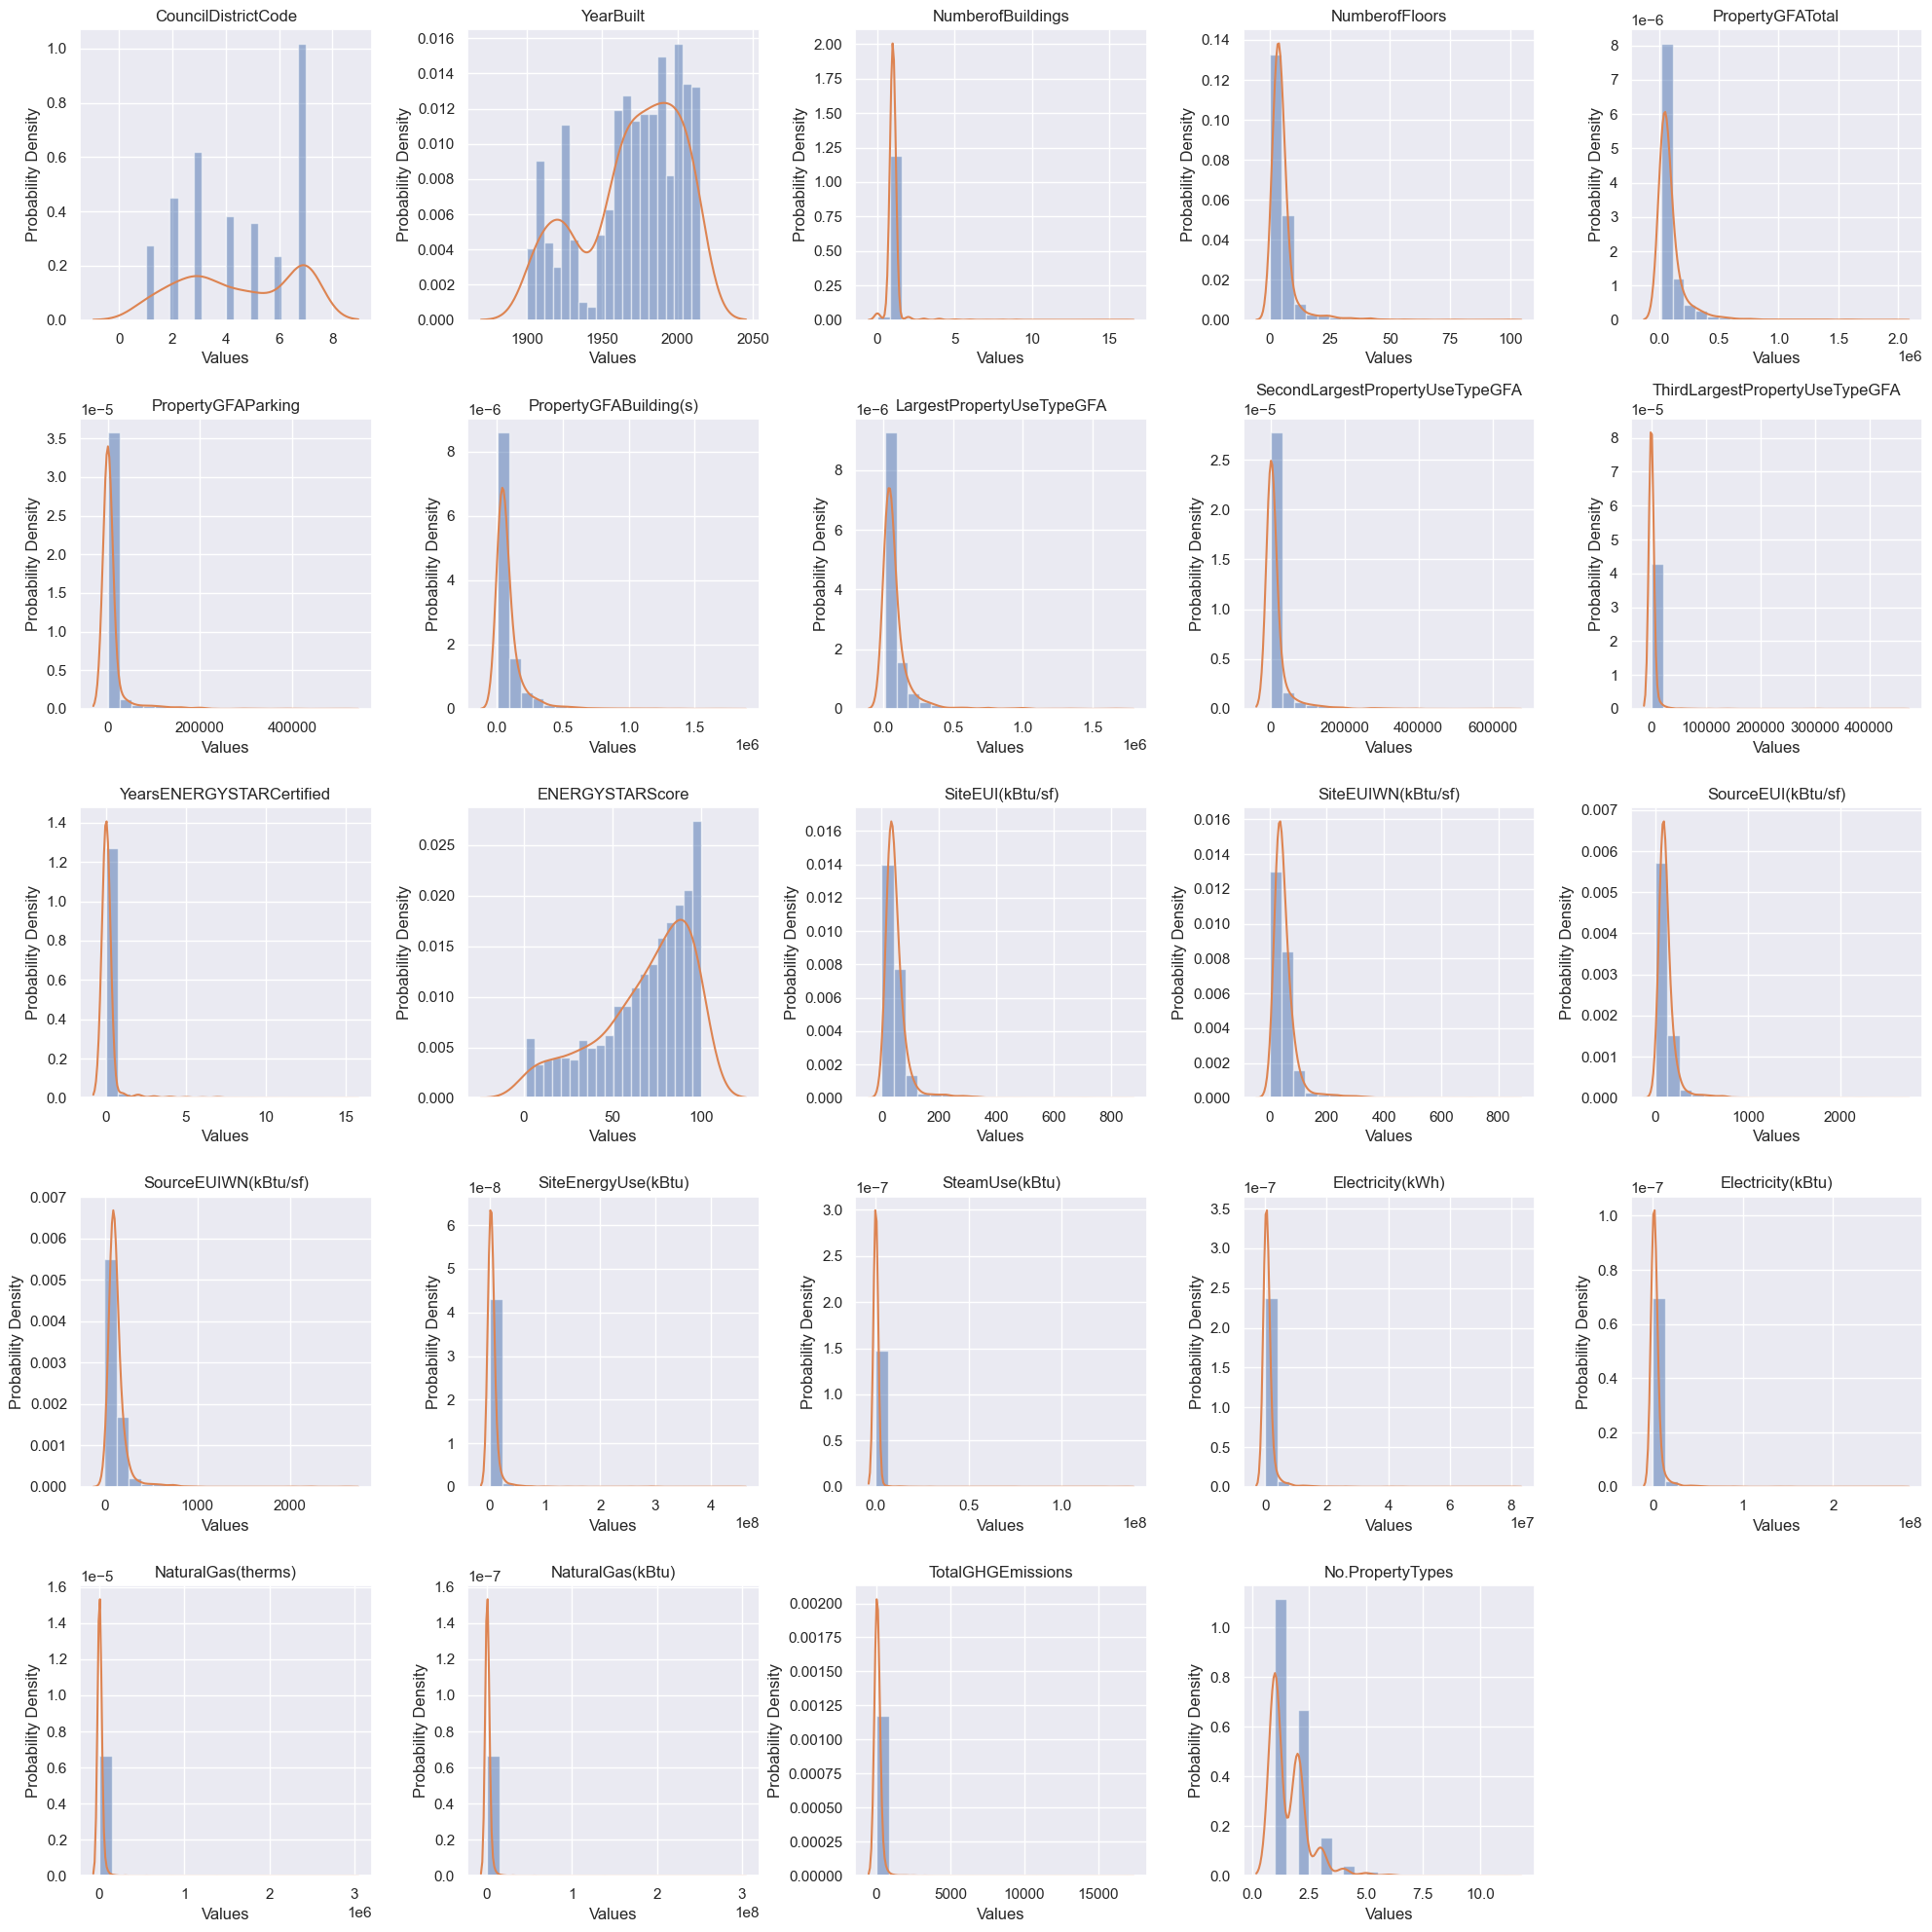

In [98]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plotting the histogram
axes = df.hist(figsize=(20,20), bins=20, density=True, alpha=0.5)

# Loop through axes and numeric columns to add KDE plot
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.kdeplot(df[col], bw_adjust=1.5, ax=ax, warn_singular=False)
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Probability Density')

# Show the plot
plt.tight_layout()
plt.show()

# Univariate Analysis - Categorical

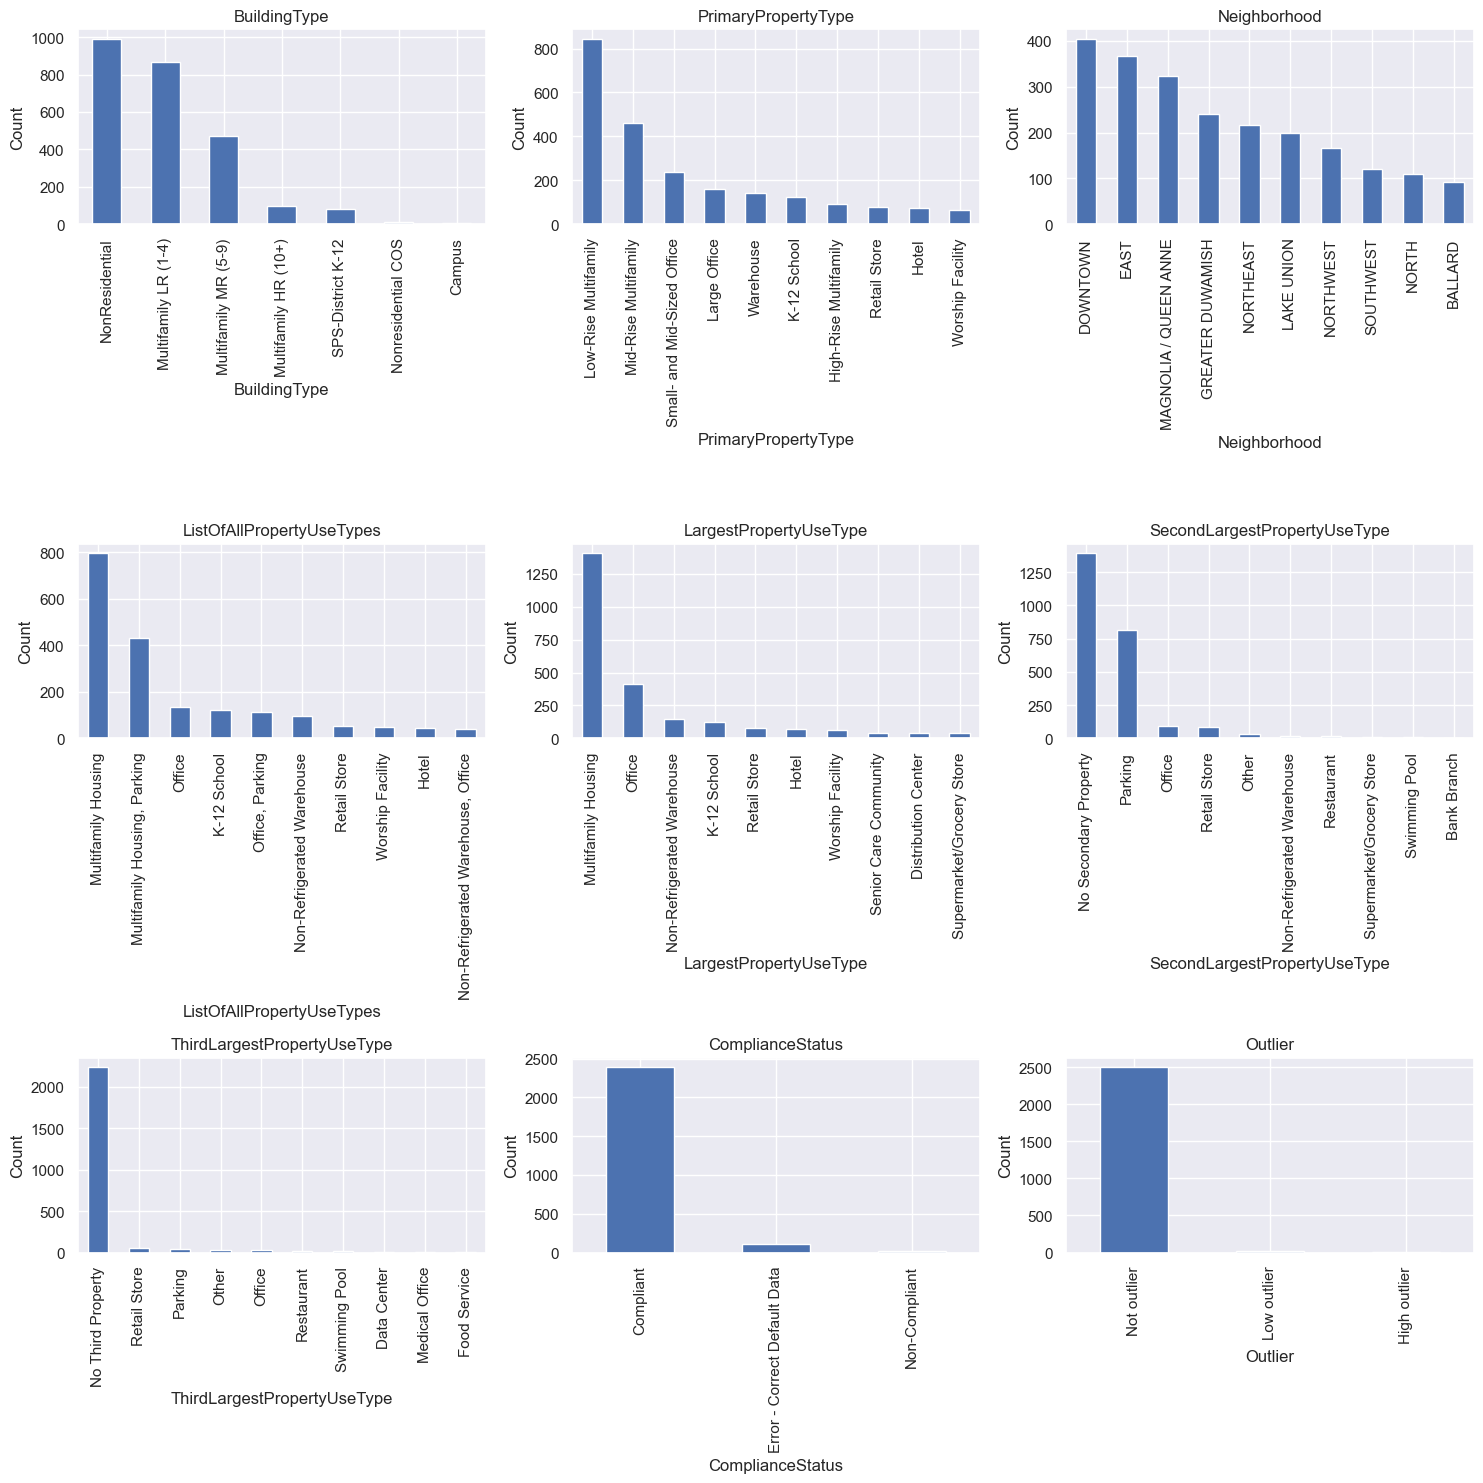

In [99]:
# Select columns with object data type from the DataFrame
encoded_df = df.select_dtypes(include='object')
object_cols = encoded_df.columns.to_list()

# Calculate number of rows needed for subplots
num_cols_per_row = 3
n = len(object_cols)
n_rows = (n + num_cols_per_row - 1) // num_cols_per_row  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, num_cols_per_row, figsize=(15, n_rows * 5))

# Plot the top 20 value counts for each object column
for index, (ax, col) in enumerate(zip(axes.flatten(), object_cols)):
    top_values = encoded_df[col].value_counts().head(10)
    top_values.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Count')

# Remove empty subplots
for i in range(n, n_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Transform Numerical Variables

In [100]:
for col in df.select_dtypes(include=[np.number]).columns.tolist():
    print(col)
    df[col] = MinMaxScaler().fit_transform(df[col].values.reshape(-1, 1))

CouncilDistrictCode
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
YearsENERGYSTARCertified
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
TotalGHGEmissions
No.PropertyTypes


# Transform Categorical Variables

In [101]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(col)
    df[col] = LabelEncoder().fit_transform(df[col])

BuildingType
PrimaryPropertyType
Neighborhood
ListOfAllPropertyUseTypes
LargestPropertyUseType
SecondLargestPropertyUseType
ThirdLargestPropertyUseType
ComplianceStatus
Outlier


# Multivariate

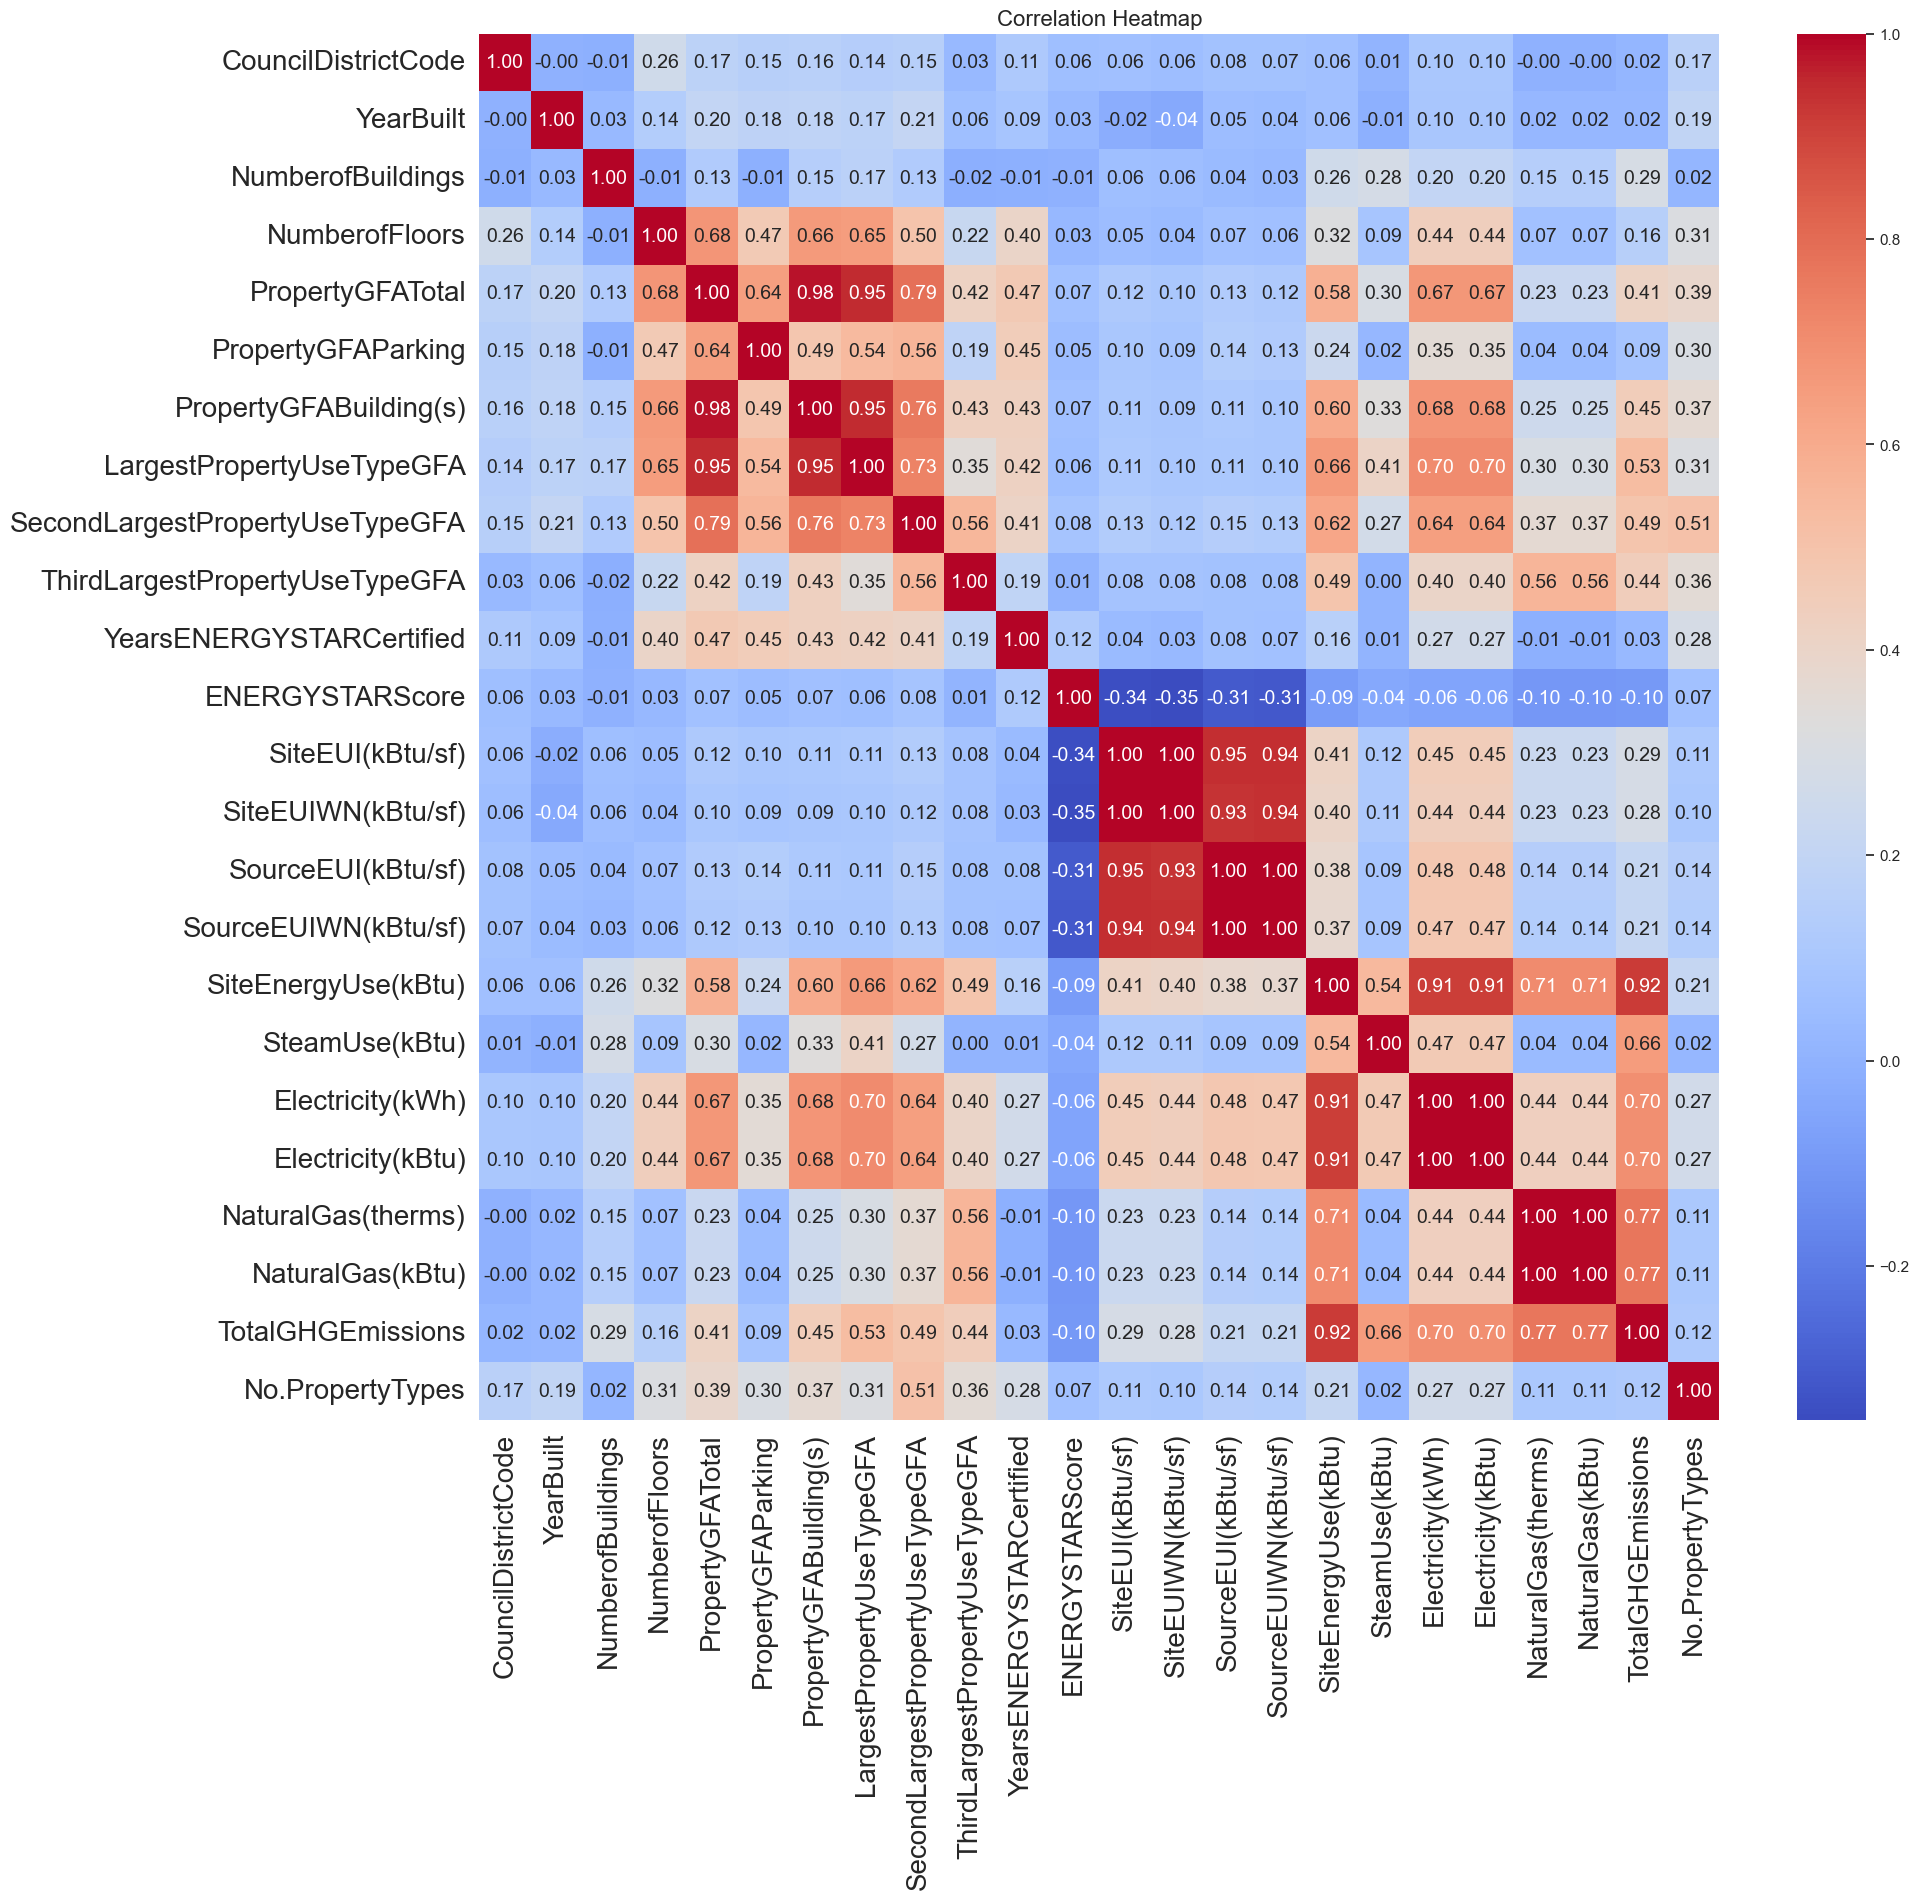

In [102]:
# 1. Correlation Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 14},  # Adjust the annotation size
            #cbar_kws={'label': 'Correlation Coefficient', 'labelsize': 14}  # Adjust color bar label size
            )

# Adjust x and y tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust title size
plt.title('Correlation Heatmap', fontsize=16)

plt.show()

# Create New Variables from Existing Ones

In [103]:
CURRENT_YEAR = 2023
df['AgeOfBuilding'] = CURRENT_YEAR - df['YearBuilt']  # Assuming current year is 2023
df['EnergyEfficiency'] = (df['Electricity(kBtu)'] + df['NaturalGas(kBtu)']) / df['PropertyGFATotal']

# Mathematical Transformations

Comparing model performance with and without transformations lead me to leaving out transformations as performance declined when included

In [104]:
def normalize_dataframe(df):
    # Step 1: Identify Numerical Columns
    num_df = df.select_dtypes(include=['number'])
    
    # Create a dictionary to store transformation results
    transformation_dict = {}
    
    for column in num_df.columns:
        # Step 2: Test for Normality (using Shapiro-Wilk test)
        _, p_value_initial = stats.shapiro(num_df[column])
        
        # If p-value is greater than 0.05, data is normal. No transformation needed.
        if p_value_initial > 0.05:
            transformation_dict[column] = "No transformation needed"
            continue
        
        # Step 3: Apply Transformations
        transformations = {
            "Log": np.log,
            "Square Root": np.sqrt,
            "Cube Root": lambda x: x**(1/3),
            "Inverse": lambda x: 1 / (x + 1e-5),  # Adding a small constant to avoid division by zero
            "Exponential": np.exp,
            "Box-Cox": lambda x: boxcox(x + 1e-5)[0],  # Adding a small constant to make all values positive
            "Yeo-Johnson": lambda x: yeojohnson(x + 1e-5)[0],  # Adding a small constant to stabilize variance
        }
        
        for trans_name, trans_func in transformations.items():
            # Applying transformation
            transformed_data = trans_func(num_df[column])
            
            # Check for infinite values
            if np.any(np.isinf(transformed_data)):
                continue  # Skip to the next transformation if inf or -inf are produced
            
            # Step 4: Re-Test for Normality
            _, p_value_transformed = stats.shapiro(transformed_data)
            
            # If p-value is greater than 0.05, data is now normal.
            if p_value_transformed > 0.05:
                transformation_dict[column] = f"Transformed by {trans_name}"
                df[column] = transformed_data  # Update the column in the original DataFrame
                break
        else:
            transformation_dict[column] = "No transformation achieved normality"
    
    return df, transformation_dict

#df.dropna(inplace=True)

# Note: Replace 'df' with your actual DataFrame
#df, transformations_applied = normalize_dataframe(df)

# Uncomment to show transformations applied
#transformations_applied


# Remove Data Leaks

In [105]:
def remove_highly_correlated(df, threshold=0.95, columns_to_keep=[]):
    """
    Removes highly correlated columns from a DataFrame, with an option to keep specific columns.

    Parameters:
    df (DataFrame): The input DataFrame.
    threshold (float): The correlation threshold above which one variable will be removed.
    columns_to_keep (list): List of columns that should not be removed.

    Returns:
    DataFrame: A new DataFrame with highly correlated columns removed.
    """

    # Step 1: Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Step 2: Create a boolean mask to ignore the diagonal and upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Step 3: Zero out the masked part of the matrix
    tri_corr_matrix = corr_matrix.mask(mask)

    # Step 4: Find columns that have correlation greater than the threshold
    to_drop = [col for col in tri_corr_matrix.columns if any(tri_corr_matrix[col] > threshold) and col not in columns_to_keep]

    if len(to_drop) > 0:
        print("Varaibles to drop:")
        for drop_var in to_drop:
            print(f"\t-{drop_var}")

    # Step 5: Drop those columns from the DataFrame
    df_reduced = df.drop(to_drop, axis=1)

    return df_reduced

df = remove_highly_correlated(df, columns_to_keep = ['SiteEnergyUse(kBtu)', 'ENERGYSTARScore', 'TotalGHGEmissions'])

Varaibles to drop:
	YearBuilt
	PropertyGFATotal
	SiteEUI(kBtu/sf)
	SourceEUI(kBtu/sf)
	Electricity(kWh)
	NaturalGas(therms)


# Save Data

In [24]:
df.to_csv("2016_Building_Energy_Benchmarking_Clean.csv.bz2", compression="bz2", index = False)